# AND

In [33]:
import numpy as np

datos = np.array([[1,0,0],
                 [1,0,1],
                 [1,1,0],
                 [1,1,1]])

esperado = np.array([-1,
                    -1,
                    -1,
                    1])

LR = 0.5

Ws = np.array([1,0.35,0.24])


#-----------------------------------------------

def salida(ins,datos,Ws):#Calculamos el valor de la salida esperada
    s = 0
    for i in range(datos[ins].size):
        s += (datos[ins][i]*Ws[i])
    return(s)

def umbral(ins,datos,Ws):#Calculamos en que rango se encunetra el resultado
    return(np.where(salida(ins,datos,Ws) >= 0, 1, -1))
    
def actualizar(w,n,e,s,x):
    #print(w,n,e,s,x)
    #print()
    return(w+(n*(e-s)*x))
    
def proceso(datos,esperado,LR,Ws,dn=np.empty((4,3)),ix=1):#Se realiza todo el proceso de calculo
    error = 0
    for i in range(datos[:,0].size):#Se recorren todas las instancias
        U = umbral(i,datos,Ws)
        #print(U)
        dn[i][ix] = U
        if U!=esperado[i]:#Si el resultado no es correcto se actualiza
            error+=1
            for y in range(datos[i].size):
                R = actualizar(Ws[y],LR,esperado[i],U,datos[i][y])
                Ws[y] = R
                #print(R)
    #print("Errores: ",error)
    return error
    
#proceso(datos,esperado,LR,Ws,error)

Generaciones:  0


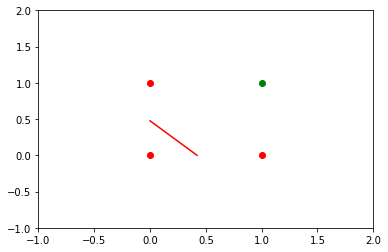

In [32]:
import matplotlib.pyplot as plt

plt.plot(datos[0,1],datos[0,2],'ro')
plt.plot(datos[1,1],datos[1,2],'ro')
plt.plot(datos[2,1],datos[2,2],'ro')
plt.plot(datos[3,1],datos[3,2],'go')
pasadas=0
while(proceso(datos,esperado,LR,Ws)!=0):
    X1 = (-Ws[0]/Ws[1])
    X2 = (-Ws[0]/Ws[2])
    plt.plot([0,X1],[X2,0],'c--')
    pasadas+=1
    
X1 = (-Ws[0]/Ws[1])
X2 = (-Ws[0]/Ws[2])
plt.plot([0,X1],[X2,0],'r-')

plt.axis([-1,2,-1,2])
plt.show

print("Generaciones: ",pasadas)

# OR

Generaciones:  5


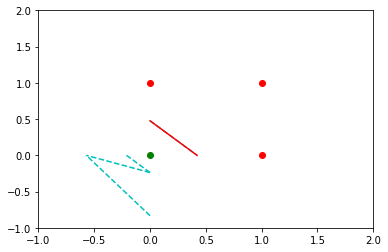

In [31]:
datos = np.array([[1,0,0],
                 [1,0,1],
                 [1,1,0],
                 [1,1,1]])

esperado = np.array([-1,
                      1,
                      1,
                      1])

LR = .3

Ws = np.array([1.4,0.35,0.24])

#-----------------------------------------------------

import matplotlib.pyplot as plt

plt.plot(datos[0,1],datos[0,2],'go')
plt.plot(datos[1,1],datos[1,2],'ro')
plt.plot(datos[2,1],datos[2,2],'ro')
plt.plot(datos[3,1],datos[3,2],'ro')
pasadas=0
while(proceso(datos,esperado,LR,Ws)!=0):
    X1 = (-Ws[0]/Ws[1])
    X2 = (-Ws[0]/Ws[2])
    plt.plot([0,X1],[X2,0],'c--')
    pasadas+=1
    
X1 = (-Ws[0]/Ws[1])
X2 = (-Ws[0]/Ws[2])
plt.plot([0,X1],[X2,0],'r-')

plt.axis([-1,2,-1,2])
plt.show

print("Generaciones: ",pasadas)